Importing Dependencies

In [53]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [63]:
#Selecting runtime
if torch.cuda.is_available():
  device = 'cuda' 
else:
  device = 'cpu' 
print(device)

cuda


Defining transformer to convert our data to pytorch format and normalizing our data

In [54]:
#Transforms data and normalizes values between -1 and 1.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5))])

Fetching data

In [55]:
#Downloading training data
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)

#Downloading testing data
testset = torchvision.datasets.MNIST('mnist',
                                    train = False,
                                    download = True,
                                    transform = transform)

In [56]:
#Function for plotting data
def imgshow(image = None, size = 5):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis(False)
  plt.show()

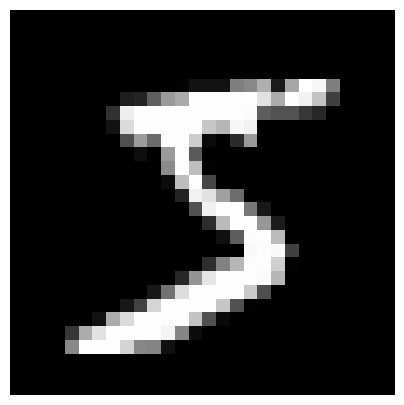

In [57]:
image = trainset.data[0].numpy()
imgshow(image)

In [58]:
trainset.data.shape

torch.Size([60000, 28, 28])

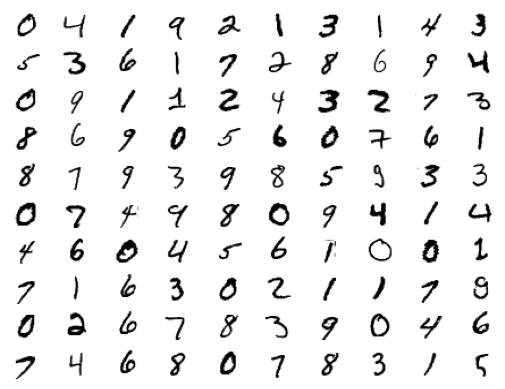

In [59]:
#Plotting starting 100 images
number_of_images = 100
plt.figure()

for index in range(1, number_of_images + 1):
  plt.subplot(10, 10, index)
  plt.axis(False)
  plt.imshow(trainset.data[index], cmap = 'gray_r')

Creating Data Loader

In [60]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 128,
                                          shuffle = True,
                                          num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 128,
                                         shuffle = False,
                                         num_workers = 0)

In [61]:
#Iterator for dataloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


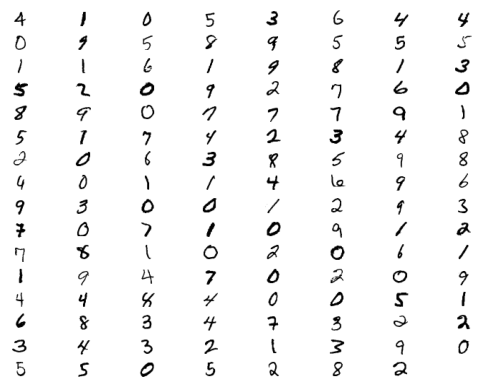

In [62]:
number_of_images = 128
plt.figure()

for index in range(1, number_of_images):
  plt.subplot(16, 8, index)
  plt.axis(False)
  plt.imshow(images[index][0].numpy(), cmap = 'gray_r')

Building Model

In [67]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*12*12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64*12*12)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)